In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings

In [62]:
data=pd.read_csv('CarPrice_Assignment.csv')

In [63]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [64]:
data.shape

(205, 26)

In [67]:
data['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [68]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

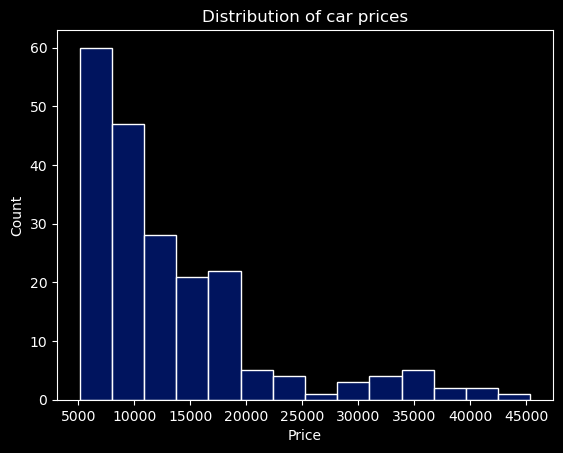

In [70]:
#visualization
plt.style.use('dark_background')
sns.set_palette('dark')
sns.histplot(data['price'])
plt.title('Distribution of car prices',color='white')
plt.xlabel('Price',color='white')
plt.ylabel('Count',color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

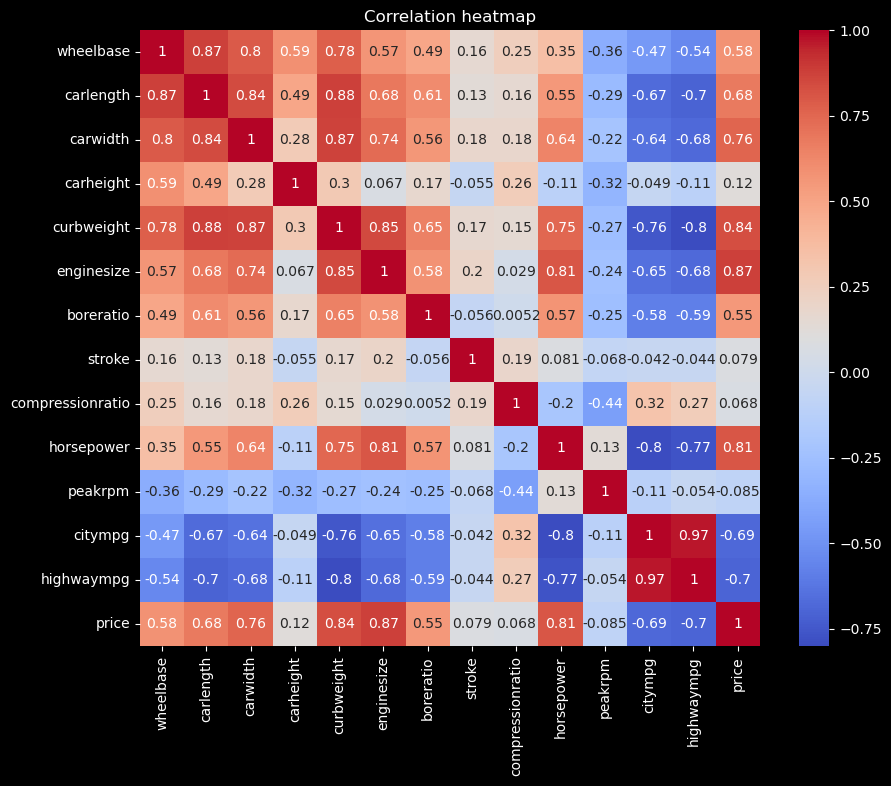

In [71]:
numeric_features=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke',
                 'compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
correlation_matrix=data[numeric_features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation heatmap',color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()

In [73]:
#Processing data
feature_columns = data.drop('price', axis=1)
target_column='price'
x=feature_columns
y=data[target_column]

In [74]:
label_encoder=LabelEncoder()
for col in x.columns:
    if x[col].dtype =='object':
        x[col] = label_encoder.fit_transform(x[col])

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [76]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [77]:
#evaluate 
predictions=model.predict(x_test)
mse=mean_squared_error(y_test,predictions)
rmse=np.sqrt(mse)
print('Root Mean Squared Error:',rmse)

Root Mean Squared Error: 3508.0081674554986


In [78]:
#Deployment and prdiction
data.columns


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [79]:
import pandas as pd

#New data
new_car_data = [[1, 3, 'alfa-romero giulia', 'gas', 'std', 'two', 'convertible', 'rwd', 'front',
                 88.6, 168.8, 64.1, 48.8, 2548, 'dohc', 'four', 130, 'mpfi', 3.47, 2.68, 9.0, 111, 5000, 21, 27]]
# Define the column names based on the original dataset's columns
new_car_columns = ['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
                   'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
                   'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
                   'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
                   'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
# Create a DataFrame with the data and column names
new_car_df = pd.DataFrame(new_car_data, columns=new_car_columns)

# Drop the 'CarName' column as it's not needed for prediction
new_car_df.drop(columns=['CarName'], inplace=True)

# Encode categorical columns (one-hot encoding)
new_car_encoded = pd.get_dummies(new_car_df, drop_first=True)
new_car_encoded = new_car_encoded.reindex(columns=x_train.columns, fill_value=0)

# Predict the car price using the model
predicted_price = model.predict(new_car_encoded)

# Ensure the predicted price is positive
predicted_price = max(0, predicted_price)  # Ensure the price is not negative

print('Predicted_price:', predicted_price)

Predicted_price: [5293.14781898]


In [43]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,3,2,1,std,two,0,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,30,5000,21,27,13495.0
1,1,3,3,1,std,two,0,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,30,5000,21,27,16500.0
2,2,1,1,1,std,two,2,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,45,5000,19,26,16500.0
3,3,2,4,1,std,four,3,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,27,5500,24,30,13950.0
4,4,2,5,1,std,four,3,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,33,5500,18,22,17450.0


In [44]:
data.describe()

,car_ID,symboling,CarName,fueltype,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,102.000000,0.834146,77.209756,0.902439,2.614634,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,24.731707,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,41.014583,0.297446,0.859081,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,15.113662,476.985643,6.542142,6.886443,7988.852332
min,0.000000,-2.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,0.000000,4150.000000,13.000000,16.000000,5118.000000
25%,51.000000,0.000000,44.000000,1.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,10.000000,4800.000000,19.000000,25.000000,7788.000000
50%,102.000000,1.000000,80.000000,1.000000,3.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,23.000000,5200.000000,24.000000,30.000000,10295.000000
75%,153.000000,2.000000,115.000000,1.000000,3.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,34.000000,5500.000000,30.000000,34.000000,16503.000000
max,204.000000,3.000000,146.000000,1.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,58.000000,6600.000000,49.000000,54.000000,45400.000000


In [15]:
#data processing
#handle missing values
data.fillna(0,inplace=True)


In [56]:
#Encode caegorical variables
label_encoder=LabelEncoder()
data['carbody']=label_encoder.fit_transform(data['carbody'])
data['CarName']=label_encoder.fit_transform(data['CarName'])
data['fueltype']=label_encoder.fit_transform(data['fueltype'])


In [57]:
#split the dataset into features (X) and target (y)
X=data.drop('price',axis=1)
y=data['price']


In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1,random_state=84)

In [59]:
model=RandomForestRegressor(n_estimators=100, random_state=84)



In [60]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

ValueError: could not convert string to float: 'std'

ValueError: could not convert string to float: 'std'